## Contract analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_contract.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_contract.csv")

In [3]:
df_contract_good.head()

,token_address,chain,token_name,contract_name,verified,owner,creator,is_hidden_owner,is_proxy,is_sellable,...,mint_function_detected_number,ownership_renounced_number,is_honeypot_suspected_number,delayed_trading_detected_number,transfer_cooldown_detected_number,high_tax_detected_number,blacklist_or_whitelist_detected_number,trading_disabled_possible_number,other_suspicious_detected_number,error
0,0x000000096cb3d4007fc2b79b935c4540c5c2d745,eth,Jigsaw USD,JigsawUSD,True,0x4fc32e984d689063e9284750d94a4eee6ba5c24c,0xcd4df89fb5e8d6d0a91436e0b77d24318d8f48bd,False,False,False,...,0,0,0,0,0,0,0,0,0,NaN
1,0x00000000051b48047be6dc0ada6de5c3de86a588,eth,Baby Shiba Inu,BabyShibaInu,True,NaN,0xcd6411316f2f5ee8a0e15eb45c4891bdd850d2d0,True,False,True,...,0,1,0,1,0,9,0,2,0,NaN
2,0x0000000000c5dc95539589fbd24be07c6c14eca4,eth,Milady Cult Coin,Cult,True,0xd5cd18d3cb65fdab15076618401ff79097f9d780,0x1ec7e0b7cd1a79a4afb873aeffe50ddca6446563,False,False,True,...,0,0,0,0,0,0,0,0,0,NaN
3,0x00000000000007c8612ba63df8ddefd9e6077c97,eth,NANI,Token,True,0xda000000000000d2885f108500803dfbaab2f2aa,0x1c0aa8ccd568d90d61659f060d1bfb1e6f855a20,False,False,True,...,0,0,0,0,0,0,0,0,0,NaN
4,0x000000000000012def132e61759048be5b5c6033,eth,Cortex,CX,True,NaN,0x6fd8b819bef8a4f81ff22a97690c338d7a819e7f,True,False,False,...,0,0,0,0,0,0,0,0,0,NaN


## How many contracts are verified? Have a hidden owner? proxy? sellable? Have a hardcoded owner? have public source code? abi? 

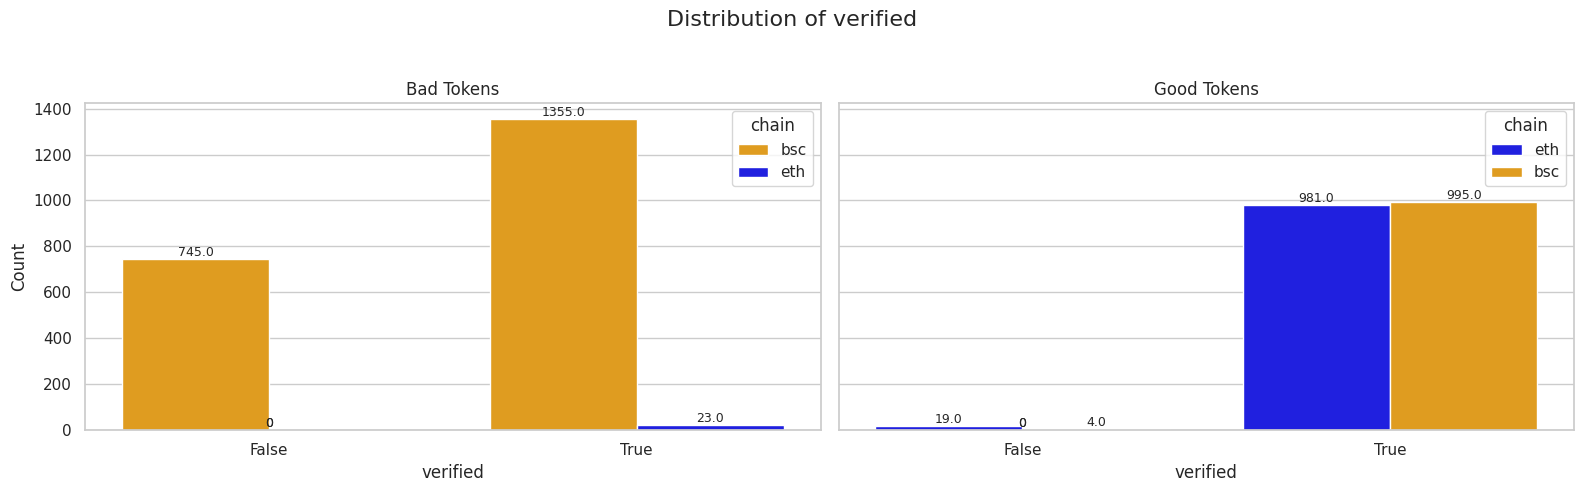

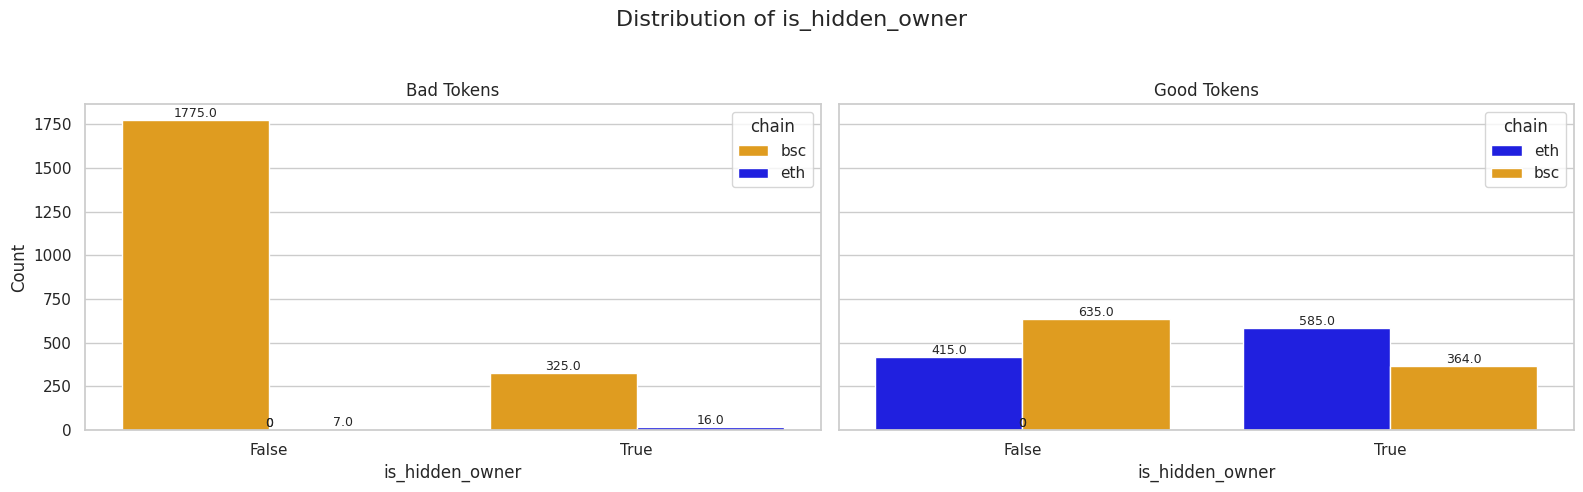

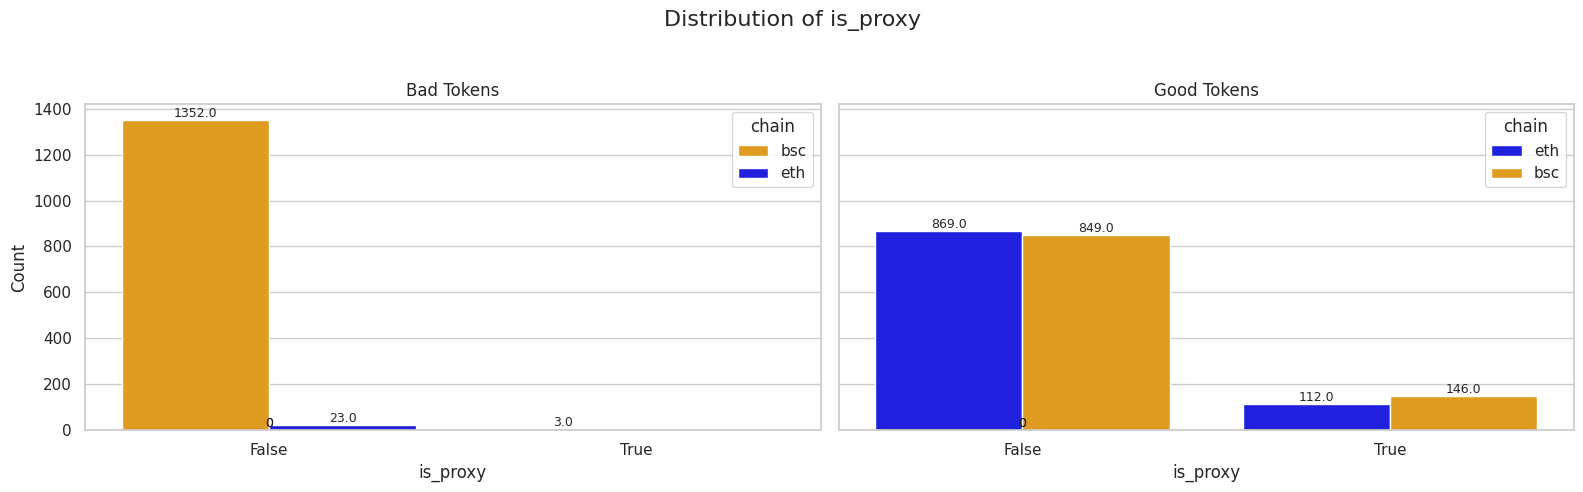

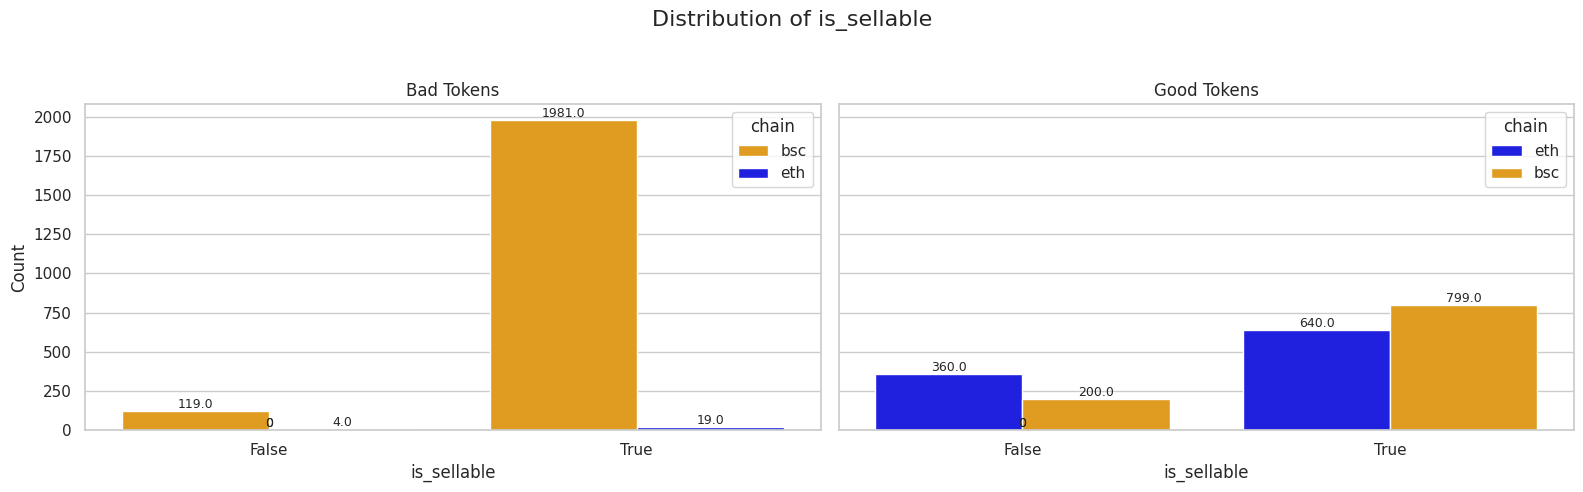

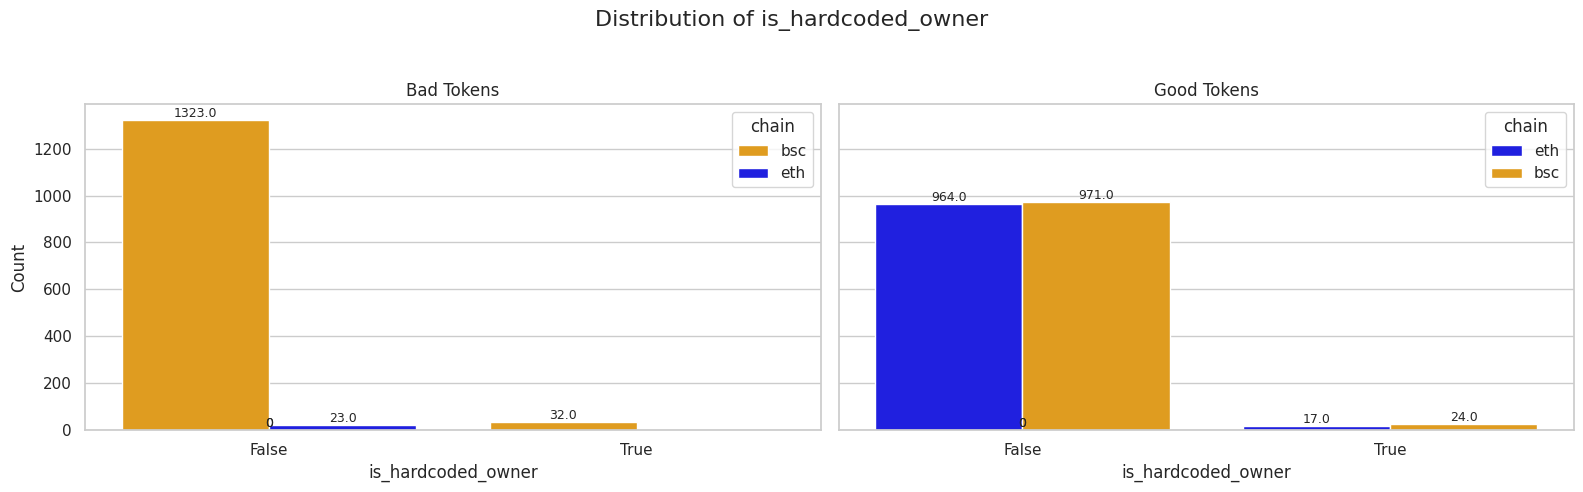

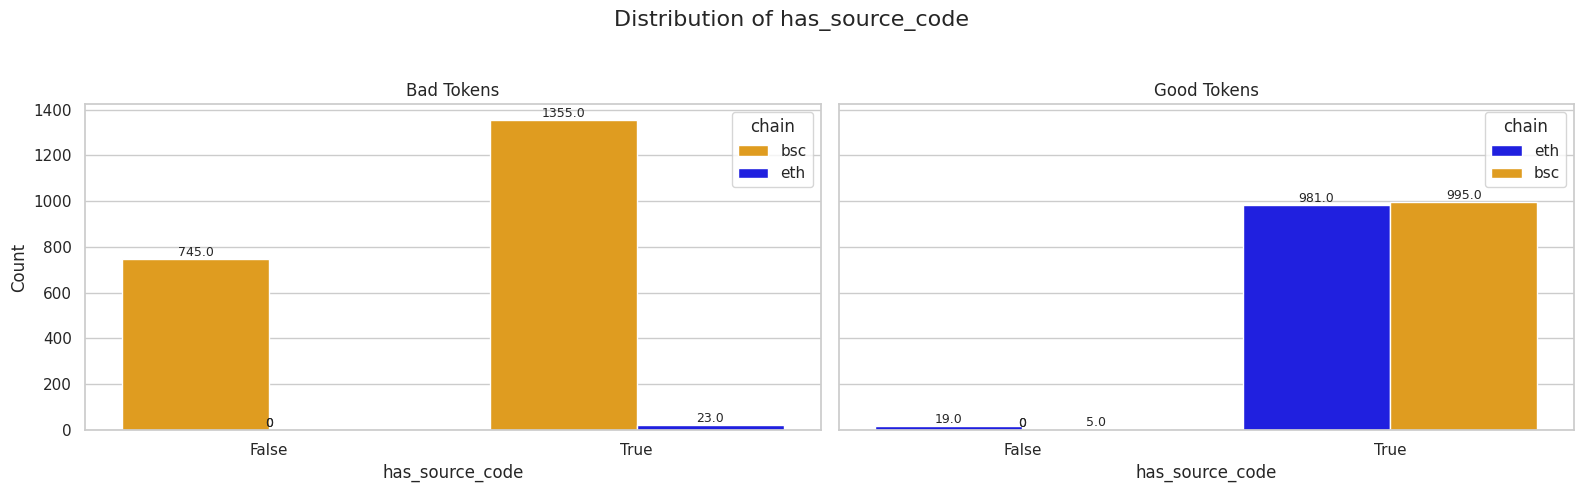

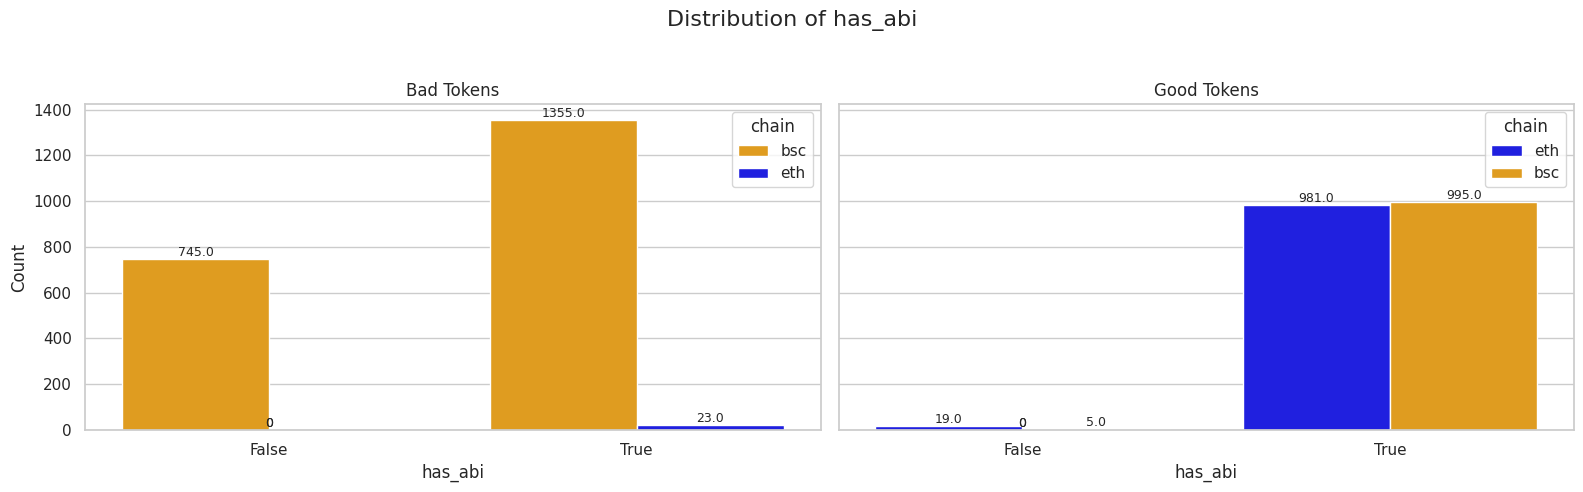

In [13]:
# Set seaborn theme and figure size
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Load data
df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_contract.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_contract.csv")

# Add 'quality' column to distinguish them later
df_contract_bad['quality'] = 'bad'
df_contract_good['quality'] = 'good'

# List of boolean-like columns
bool_cols = ['verified', 'is_hidden_owner', 'is_proxy', 'is_sellable',
             'is_hardcoded_owner', 'has_source_code', 'has_abi']

# Ensure all expected boolean columns exist in both DataFrames
for col in bool_cols:
    for df in [df_contract_bad, df_contract_good]:
        if col not in df.columns:
            df[col] = np.nan

# Helper to safely convert to boolean
def to_bool(val):
    val_str = str(val).strip().lower()
    if val_str == 'true':
        return True
    elif val_str == 'false':
        return False
    else:
        return np.nan

# Normalize boolean columns
for df in [df_contract_bad, df_contract_good]:
    for col in bool_cols:
        df[col] = df[col].apply(to_bool)

# Combine data
df_all = pd.concat([df_contract_bad, df_contract_good], ignore_index=True)

# Optional: Fill missing values in boolean columns with False (or leave as NaN)
# df_all[bool_cols] = df_all[bool_cols].fillna(False)

# Ensure 'chain' column is lowercase
df_all['chain'] = df_all['chain'].str.lower()

# Define color palette manually
custom_palette = {'eth': 'blue', 'bsc': 'orange'}

# Plot each boolean column
for col in bool_cols:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
    fig.suptitle(f'Distribution of {col}', fontsize=16)

    for ax, quality in zip(axes, ['bad', 'good']):
        subset = df_all[df_all['quality'] == quality]

        sns.countplot(
            data=subset, x=col, hue='chain', ax=ax,
            palette=custom_palette, order=[False, True]
        )

        ax.set_title(f'{quality.capitalize()} Tokens')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

        # Add annotations
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


## Snippets analysis

/tmp/ipykernel_1034615/1566488584.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = f"{height:.2f} ({percentages[i]:.1f}%)"
/tmp/ipykernel_1034615/1566488584.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_suspicious.index, rotation=45, ha='right')
/tmp/ipykernel_1034615/1566488584.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = f"{height:.2f} ({percentages[i]:.1f}%)"
/tmp/ipykernel_1034615/1566488584.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of tic

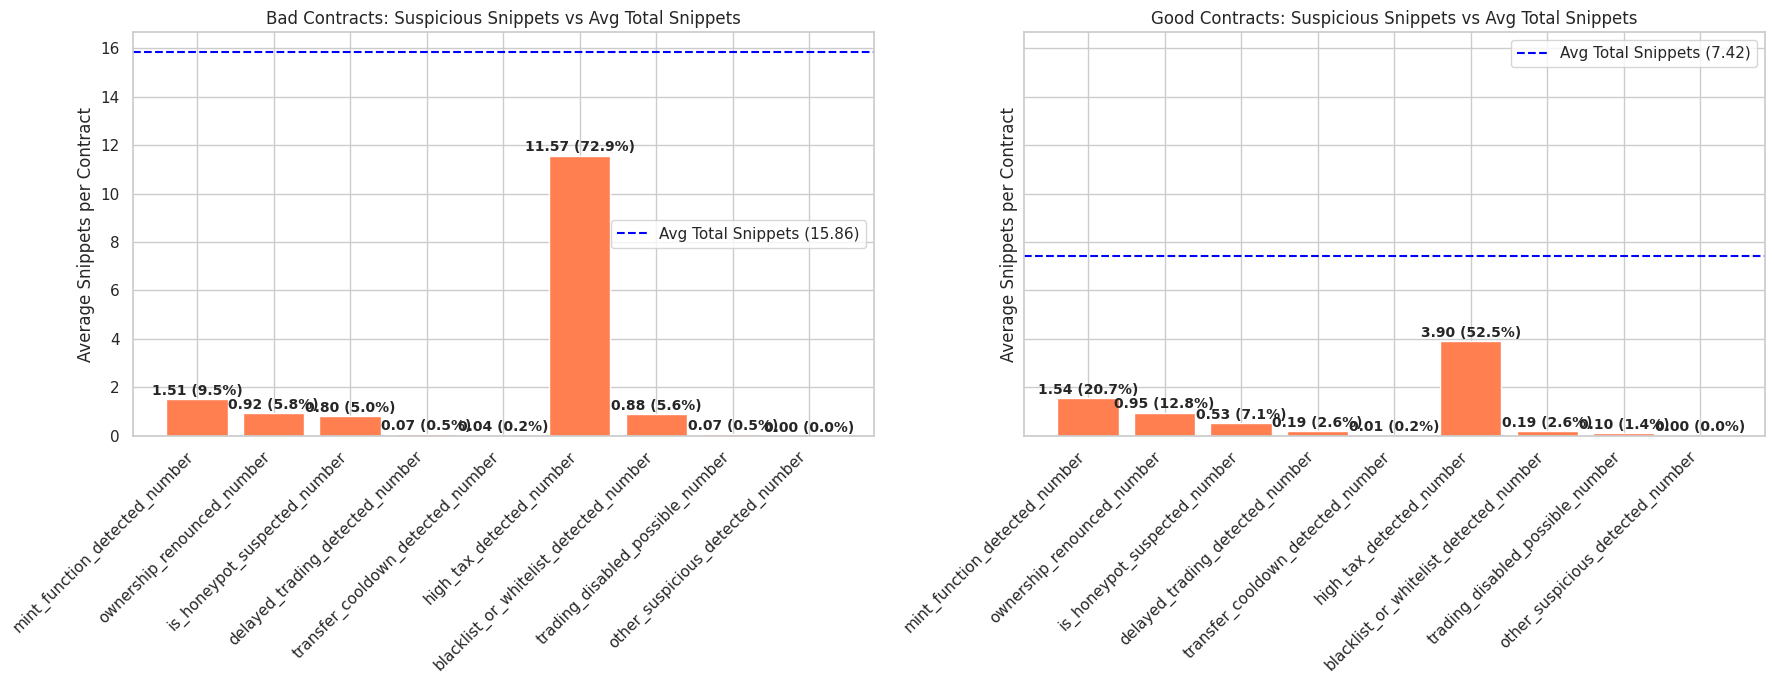

In [15]:
# Load data
df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_contract.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_contract.csv")

# Suspicious columns
suspicious_cols = [
    'mint_function_detected_number',
    'ownership_renounced_number',
    'is_honeypot_suspected_number',
    'delayed_trading_detected_number',
    'transfer_cooldown_detected_number',
    'high_tax_detected_number',
    'blacklist_or_whitelist_detected_number',
    'trading_disabled_possible_number',
    'other_suspicious_detected_number'
]

# Helper function to create each plot
def plot_suspicious(df, title, ax):
    avg_total_snippets = df['total_snippets'].mean()
    avg_suspicious = df[suspicious_cols].mean()
    percentages = (avg_suspicious / avg_total_snippets) * 100

    bars = ax.bar(avg_suspicious.index, avg_suspicious.values, color='coral')

    for i, bar in enumerate(bars):
        height = bar.get_height()
        label = f"{height:.2f} ({percentages[i]:.1f}%)"
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05,
                label, ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.axhline(avg_total_snippets, color='blue', linestyle='--',
               label=f'Avg Total Snippets ({avg_total_snippets:.2f})')

    ax.set_title(title)
    ax.set_ylabel('Average Snippets per Contract')
    ax.set_xticklabels(avg_suspicious.index, rotation=45, ha='right')
    ax.legend()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Plot for bad contracts
plot_suspicious(df_contract_bad, 'Bad Contracts: Suspicious Snippets vs Avg Total Snippets', axes[0])

# Plot for good contracts
plot_suspicious(df_contract_good, 'Good Contracts: Suspicious Snippets vs Avg Total Snippets', axes[1])

plt.tight_layout()
plt.show()


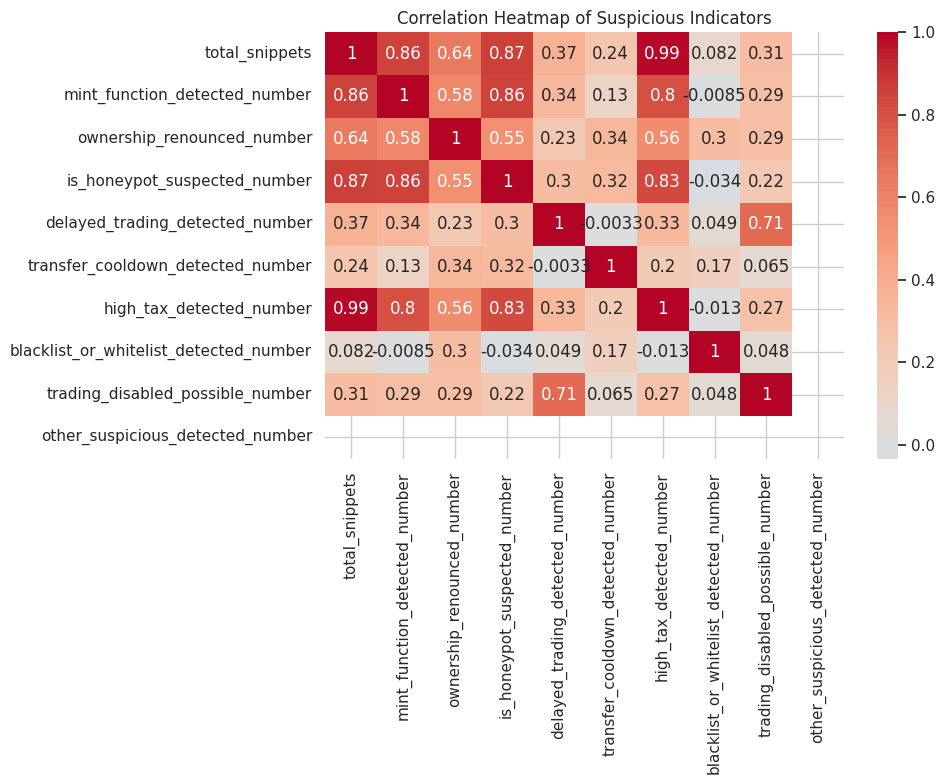

In [ ]:

# Select relevant numeric columns
suspicious_cols = [
    "total_snippets",
    "mint_function_detected_number",
    "ownership_renounced_number",
    "is_honeypot_suspected_number",
    "delayed_trading_detected_number",
    "transfer_cooldown_detected_number",
    "high_tax_detected_number",
    "blacklist_or_whitelist_detected_number",
    "trading_disabled_possible_number",
    "other_suspicious_detected_number"
]

df_numeric = df_contract[suspicious_cols]

# Calculate correlation matrix
corr = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Suspicious Indicators")
plt.tight_layout()
plt.show()